In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(
    "expt_ca_data/46L_50F_100k.dat", sep="\t", comment="#", header=None
)  # ZAP only
ca_signal_data = data.iloc[:, 1].values

In [5]:
np.max(ca_signal_data)

np.float64(100600.53125)

In [14]:
pd.read_csv("M_46L_50F.dat", sep="\t", comment="#", header=None)

,0,1
0,1,33114.67188
1,2,35263.66016
2,3,32599.50195
3,4,33108.53516
4,5,32035.26953
...,...,...
295,296,33409.05078
296,297,32378.71484
297,298,36843.50781
298,299,36886.44141


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

epochs = []
train_losses = []
val_losses = []

plt.figure(figsize=(10, 6))

while True:
    # Reset data
    epochs.clear()
    train_losses.clear()
    val_losses.clear()

    try:
        with open("track_losses.txt", "r") as f:
            for line in f:
                if "Epoch" in line:
                    parts = line.split(",")
                    epoch = int(parts[0].split("/")[0].split("[")[1])
                    train_loss = float(parts[1].split(":")[1].strip())
                    val_loss = float(parts[2].split(":")[1].split("--")[0].strip())

                    epochs.append(epoch)
                    train_losses.append(train_loss)
                    val_losses.append(val_loss)
    except Exception as e:
        print(f"⛔ Error reading file: {e}")
        time.sleep(1)
        continue

    clear_output(wait=True)
    plt.clf()

    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Live Training and Validation Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    if len(epochs) > 0 and epochs[-1] >= 250:  # adjust as needed
        print("✅ Training likely complete — stopping plot.")
        break


KeyboardInterrupt: 

In [5]:
a = np.load('synthetic_output_parameters.npy')

In [6]:
a[:, -1]

array([0.00020354, 0.00537101, 0.00020895, ..., 0.05285361, 0.00192446,
       0.00010413], shape=(40000,))

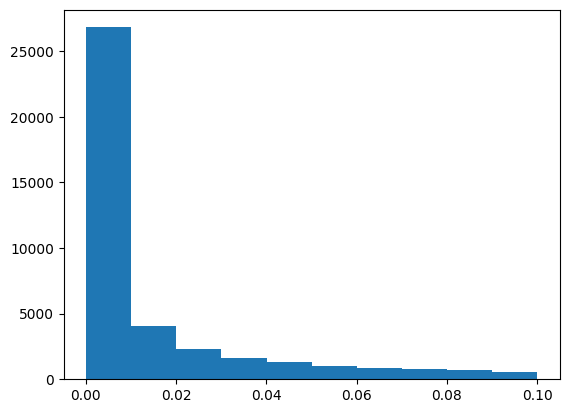

In [7]:
plt.hist(a[:, -1])
plt.show()